# Popular Answer Phrases

Now we will dive into the answer part. My aim is to see whether there is any similarity between popular questions asked and popular answers posted. Or in other words, is the community receptive enough to answer the most treding questions?

# Loading dataset

As usual, we load the dataset using `pandas`

In [1]:
import pandas as pd

ORIGINAL_DATASET = "../data/python_answers_new.csv"
data = pd.read_csv(ORIGINAL_DATASET, encoding='latin1')

# Some data type conversions
data['full_text'] = data['full_text'].astype(str)
data['CreationDate'] = pd.to_datetime(data['CreationDate'], format="%Y-%m-%dT%H:%M:%SZ")

# Extracting the year
def find_year(date):
    return date.year

data['year'] = data['CreationDate'].apply(find_year)

In [2]:
data.head()

,Unnamed: 0,Id,OwnerUserId,CreationDate,ParentId,Score,Body,full_text,is_code_present,year
0,0,497,50.0,2008-08-02 16:56:53,469,4,<p>open up a terminal (Applications-&gt;Utilit...,open up a terminal (Applications->Utilities->T...,1,2008
1,1,518,153.0,2008-08-02 17:42:28,469,2,<p>I haven't been able to find anything that d...,I haven't been able to find anything that does...,0,2008
2,2,536,161.0,2008-08-02 18:49:07,502,9,<p>You can use ImageMagick's convert utility f...,You can use ImageMagick's convert utility for ...,1,2008
3,3,538,156.0,2008-08-02 18:56:56,535,23,<p>One possibility is Hudson. It's written in...,One possibility is Hudson. It's written in Ja...,0,2008
4,4,541,157.0,2008-08-02 19:06:40,535,20,"<p>We run <a href=""http://buildbot.net/trac"">B...","We run Buildbot - Trac at work, I haven't used...",0,2008


# Defining a new list of stopwords

Here is a list of stopwords that I found from [here](http://www.ranks.nl/stopwords). On top of this, I also add a few stop words that are applicable in our case e.g. python

In [7]:
stop_words = ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', "can't", 'cause', 'causes', 'certain', 'certainly', 'co', 'com', 'come', 'comes', 'contain', 'containing', 'contains', 'could', 'couldnt', 'd', 'date', 'did', "didn't", 'different', 'do', 'does', "doesn't", 'doing', 'done', "don't", 'down', 'downwards', 'due', 'during', 'e', 'each', 'ed', 'edu', 'effect', 'eg', 'eight', 'eighty', 'either', 'else', 'elsewhere', 'end', 'ending', 'enough', 'especially', 'et', 'et - al', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'except', 'f', 'far', 'few', 'ff', 'fifth', 'first', 'five', 'fix', 'followed', 'following', 'follows', 'for', 'former', 'formerly', 'forth', 'found', 'four', 'from', 'further', 'furthermore', 'g', 'gave', 'get', 'gets', 'getting', 'give', 'given', 'gives', 'giving', 'go', 'goes', 'gone', 'got', 'gotten', 'h', 'had', 'happens', 'hardly', 'has', "hasn't", 'have', "haven't", 'having', 'he', 'hed', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'heres', 'hereupon', 'hers', 'herself', 'hes', 'hi', 'hid', 'him', 'himself', 'his', 'hither', 'home', 'how', 'howbeit', 'however', 'hundred', 'i', 'id', 'ie', 'if', "i'll", 'im', 'immediate', 'immediately', 'importance', 'important', 'in', 'inc', 'indeed', 'index', 'information', 'instead', 'into', 'invention', 'inward', 'is', "isn't", 'it', 'itd', "it'll", 'its', 'itself', "i've", 'j', 'just', 'k', 'keep\tkeeps', 'kept', 'kg', 'km', 'know', 'known', 'knows', 'l', 'largely', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', 'lets', 'like', 'liked', 'likely', 'line', 'little', "'ll", 'look', 'looking', 'looks', 'ltd', 'm', 'made', 'mainly', 'make', 'makes', 'many', 'may', 'maybe', 'me', 'mean', 'means', 'meantime', 'meanwhile', 'merely', 'mg', 'might', 'million', 'miss', 'ml', 'more', 'moreover', 'most', 'mostly', 'mr', 'mrs', 'much', 'mug', 'must', 'my', 'myself', 'n', 'na', 'name', 'namely', 'nay', 'nd', 'near', 'nearly', 'necessarily', 'necessary', 'need', 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'ninety', 'no', 'nobody', 'non', 'none', 'nonetheless', 'noone', 'nor', 'normally', 'nos', 'not', 'noted', 'nothing', 'now', 'nowhere', 'o', 'obtain', 'obtained', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'omitted', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'ord', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'owing', 'own', 'p', 'page', 'pages', 'part', 'particular', 'particularly', 'past', 'per', 'perhaps', 'placed', 'please', 'plus', 'poorly', 'possible', 'possibly', 'potentially', 'pp', 'predominantly', 'present', 'previously', 'primarily', 'probably', 'promptly', 'proud', 'provides', 'put', 'q', 'que', 'quickly', 'quite', 'qv', 'r', 'ran', 'rather', 'rd', 're', 'readily', 'really', 'recent', 'recently', 'ref', 'refs', 'regarding', 'regardless', 'regards', 'related', 'relatively', 'research', 'respectively', 'resulted', 'resulting', 'results', 'right', 'run', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'sec', 'section', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sent', 'seven', 'several', 'shall', 'she', 'shed', "she'll", 'shes', 'should', "shouldn't", 'show', 'showed', 'shown', 'showns', 'shows', 'significant', 'significantly', 'similar', 'similarly', 'since', 'six', 'slightly', 'so', 'some', 'somebody', 'somehow', 'someone', 'somethan', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specifically', 'specified', 'specify', 'specifying', 'still', 'stop', 'strongly', 'sub', 'substantially', 'successfully', 'such', 'sufficiently', 'suggest', 'sup', 'sure\tt', 'take', 'taken', 'taking', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that'll", 'thats', "that've", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'thered', 'therefore', 'therein', "there'll", 'thereof', 'therere', 'theres', 'thereto', 'thereupon', "there've", 'these', 'they', 'theyd', "they'll", 'theyre', "they've", 'think', 'this', 'those', 'thou', 'though', 'thoughh', 'thousand', 'throug', 'through', 'throughout', 'thru', 'thus', 'til', 'tip', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'ts', 'twice', 'two', 'u', 'un', 'under', 'unfortunately', 'unless', 'unlike', 'unlikely', 'until', 'unto', 'up', 'upon', 'ups', 'us', 'use', 'used', 'useful', 'usefully', 'usefulness', 'uses', 'using', 'usually', 'v', 'value', 'various', "'ve", 'very', 'via', 'viz', 'vol', 'vols', 'vs', 'w', 'want', 'wants', 'was', 'wasnt', 'way', 'we', 'wed', 'welcome', "we'll", 'went', 'were', 'werent', "we've", 'what', 'whatever', "what'll", 'whats', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'wheres', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whim', 'whither', 'who', 'whod', 'whoever', 'whole', "who'll", 'whom', 'whomever', 'whos', 'whose', 'why', 'widely', 'willing', 'wish', 'with', 'within', 'without', 'wont', 'words', 'world', 'would', 'wouldnt', 'www', 'x', 'y', 'yes', 'yet', 'you', 'youd', "you'll", 'your', 'youre', 'yours', 'yourself', 'yourselves', "you've", 'z', 'zero']
python_stop_words = ['will', 'return', 'helps', 'hope', 'http', 'https', 'python', 'scripts', 'script', 'code', 'py', 'doesn', 'work', 'works', 'fine', 'don', 'help']
stop_words.extend(python_stop_words)

# Converting into frozenset (sklearn requierement)
total_stop_words = frozenset(stop_words)

# Visualisation time!

In [4]:
%matplotlib inline
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Popular Answers 2016

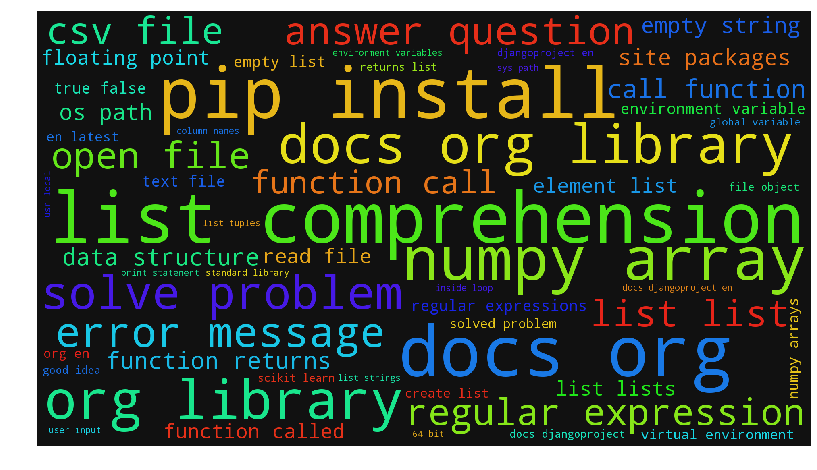

In [8]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2016]

text_dtm = vect.fit_transform(input_data)

word_freq_df_2016 = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df_2016['term'], word_freq_df_2016['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

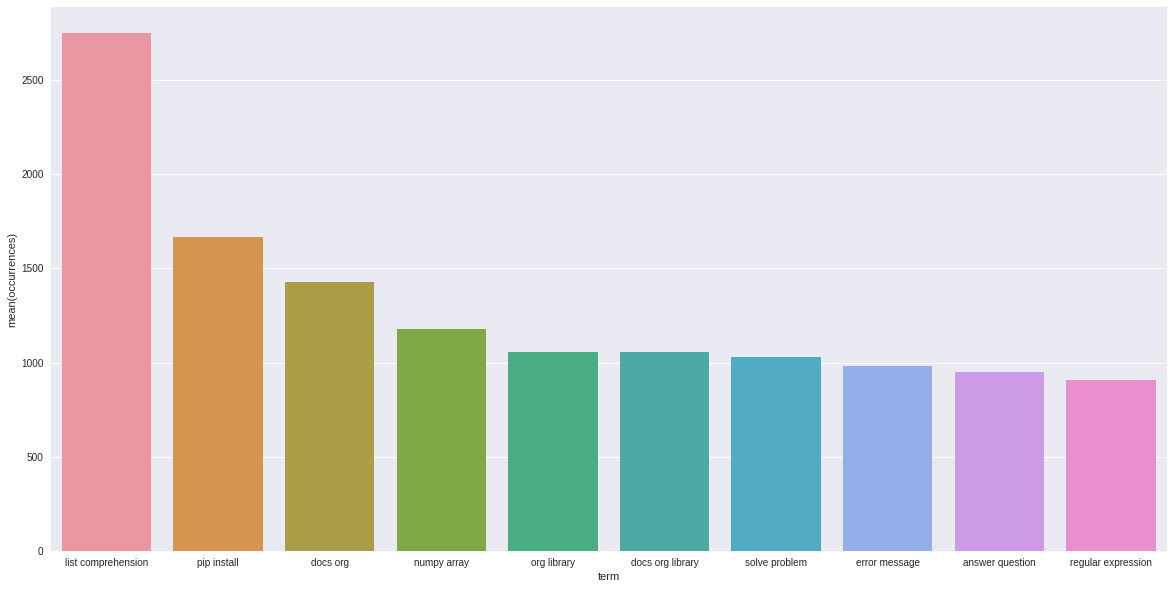

In [9]:
df = word_freq_df_2016.sort_values('occurrences', ascending=False)
plot = sns.barplot(x="term", y="occurrences", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Answers 2015

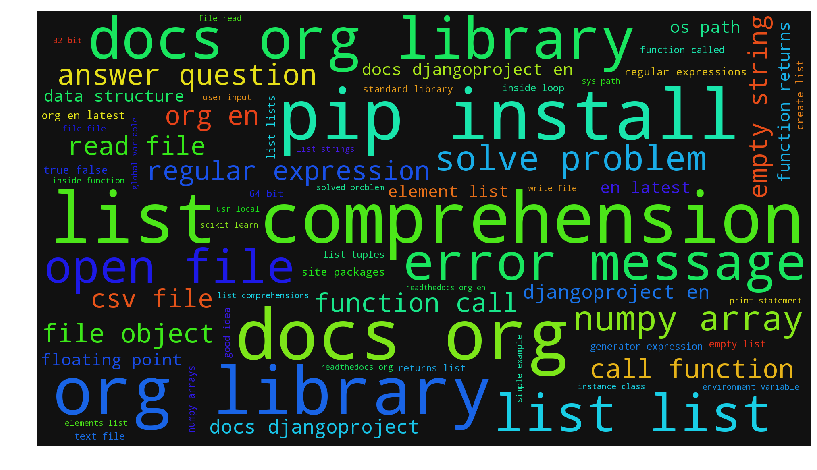

In [10]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2015]

text_dtm = vect.fit_transform(input_data)

word_freq_df_2015 = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df_2015['term'], word_freq_df_2015['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

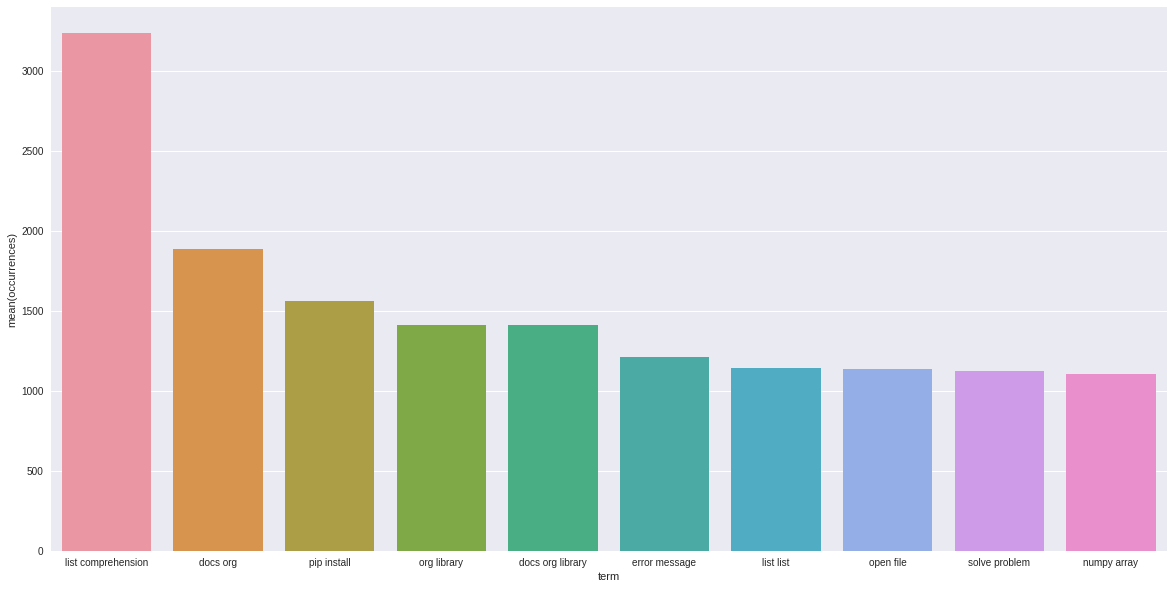

In [19]:
df = word_freq_df_2015.sort_values('occurrences', ascending=False)
plot = sns.barplot(x="term", y="occurrences", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Answers 2014

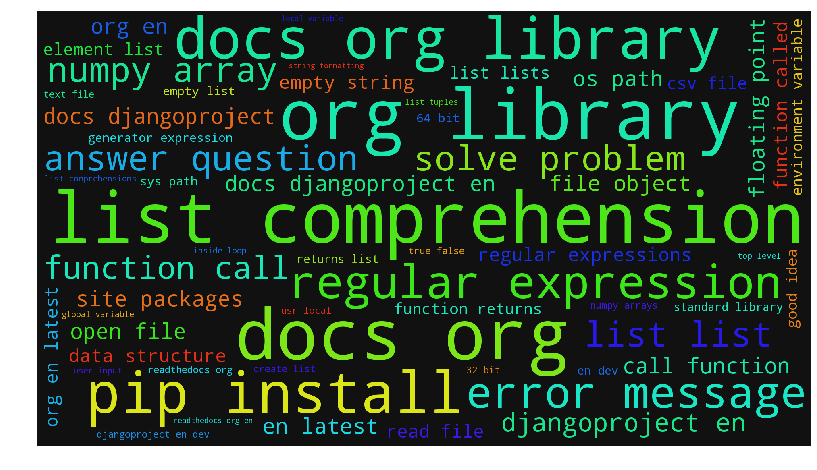

In [11]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2014]

text_dtm = vect.fit_transform(input_data)

word_freq_df_2014 = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df_2014['term'], word_freq_df_2014['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

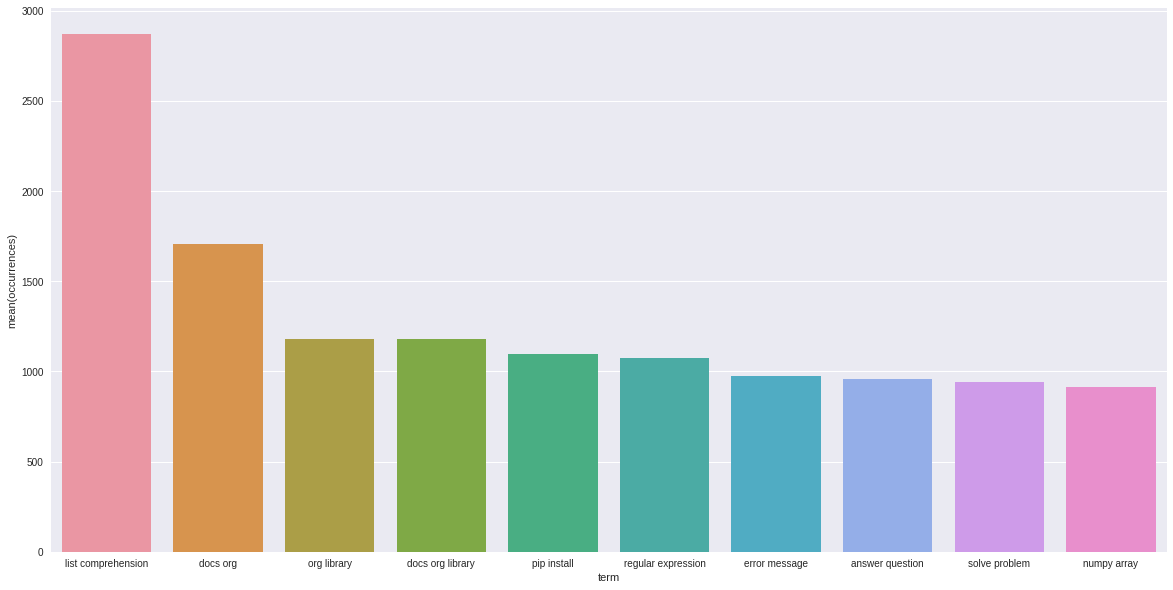

In [20]:
df = word_freq_df_2014.sort_values('occurrences', ascending=False)
plot = sns.barplot(x="term", y="occurrences", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Answers 2013

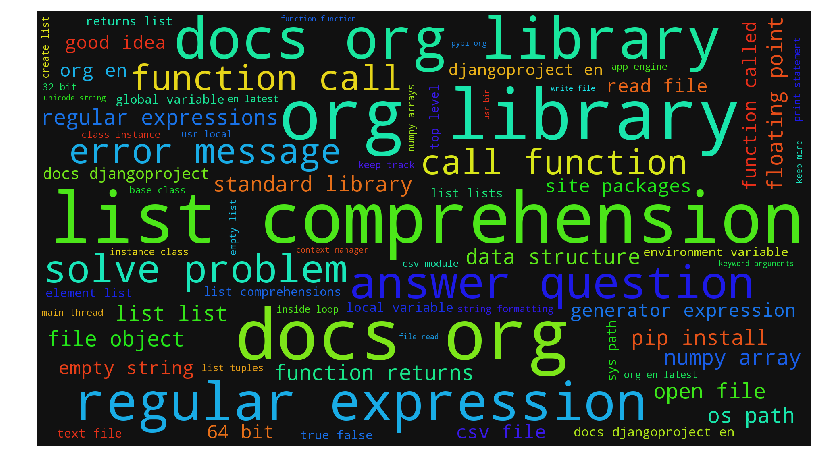

In [18]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2013]

text_dtm = vect.fit_transform(input_data)

word_freq_df_2013 = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df_2013['term'], word_freq_df_2013['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

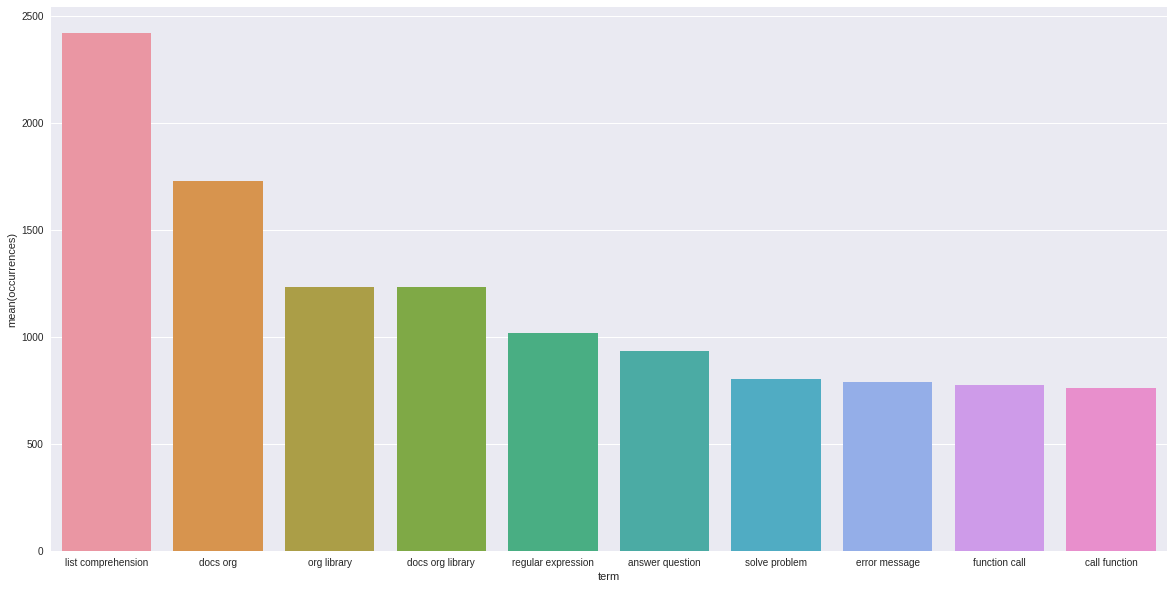

In [21]:
df = word_freq_df_2013.sort_values('occurrences', ascending=False)
plot = sns.barplot(x="term", y="occurrences", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Answers 2012

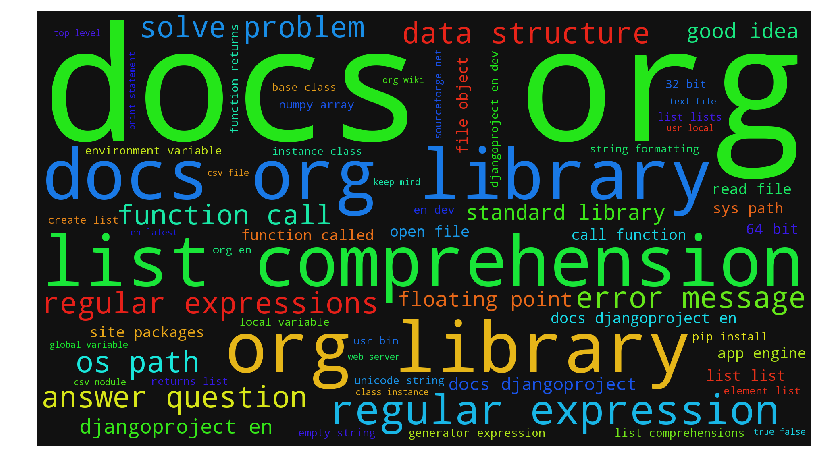

In [13]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2012]

text_dtm = vect.fit_transform(input_data)

word_freq_df_2012 = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df_2012['term'], word_freq_df_2012['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

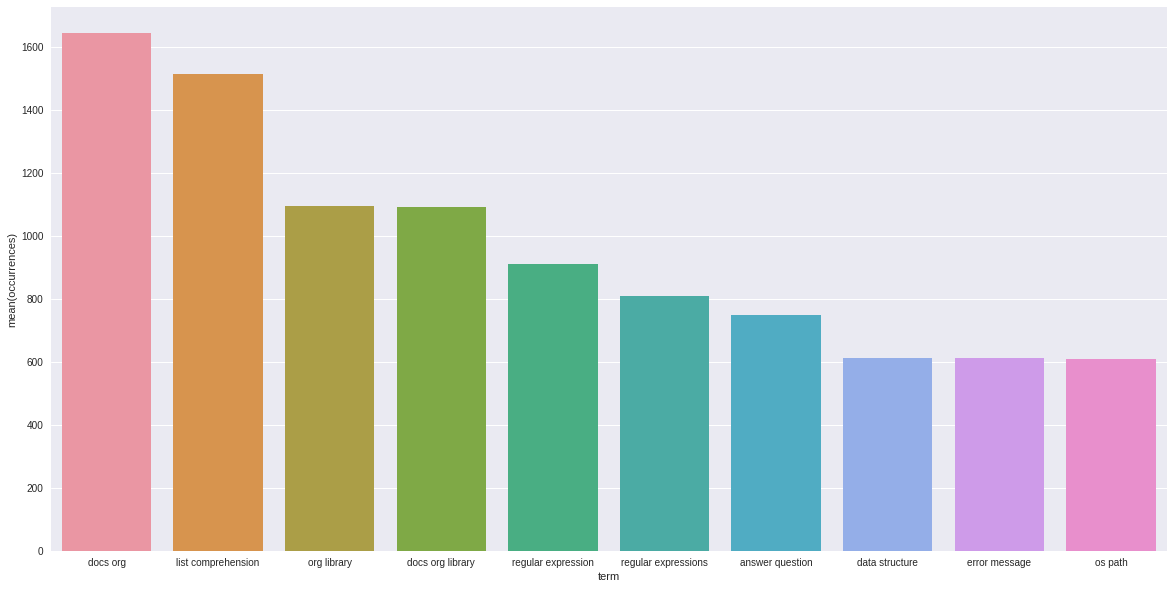

In [22]:
df = word_freq_df_2012.sort_values('occurrences', ascending=False)
plot = sns.barplot(x="term", y="occurrences", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Answers 2011

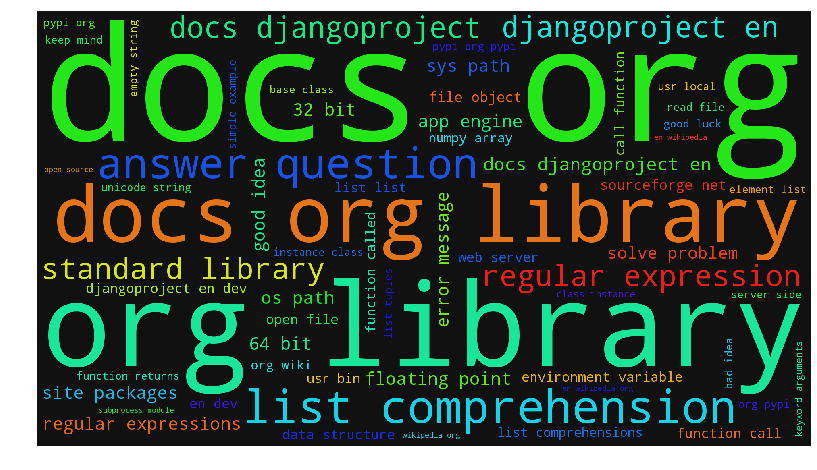

In [14]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2011]

text_dtm = vect.fit_transform(input_data)

word_freq_df_2011 = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df_2011['term'], word_freq_df_2011['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

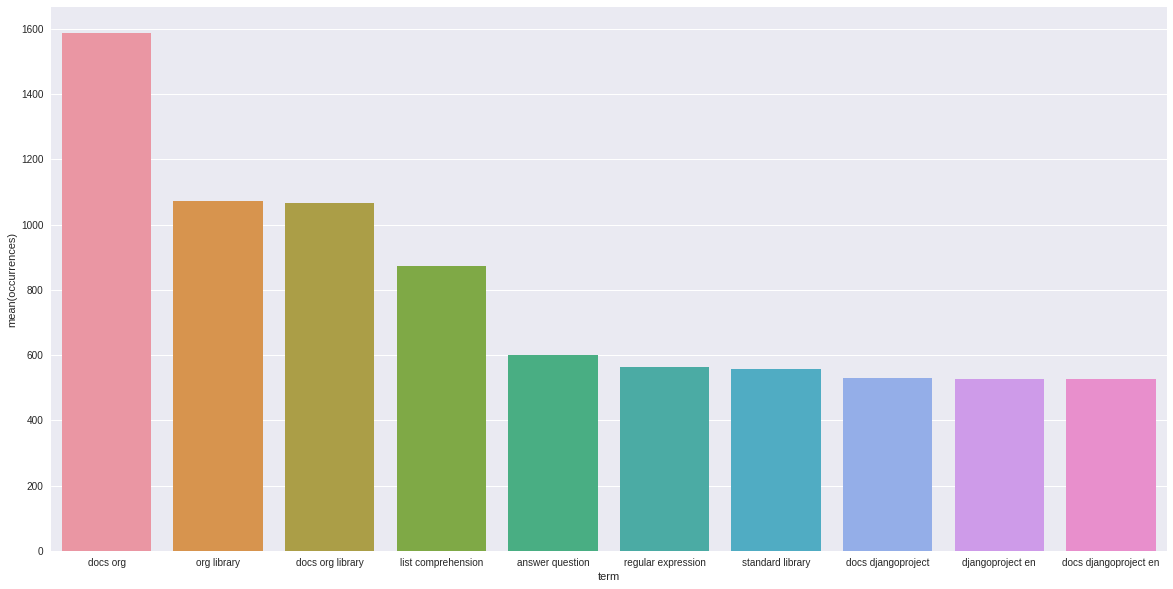

In [23]:
df = word_freq_df_2011.sort_values('occurrences', ascending=False)
plot = sns.barplot(x="term", y="occurrences", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Answers 2010

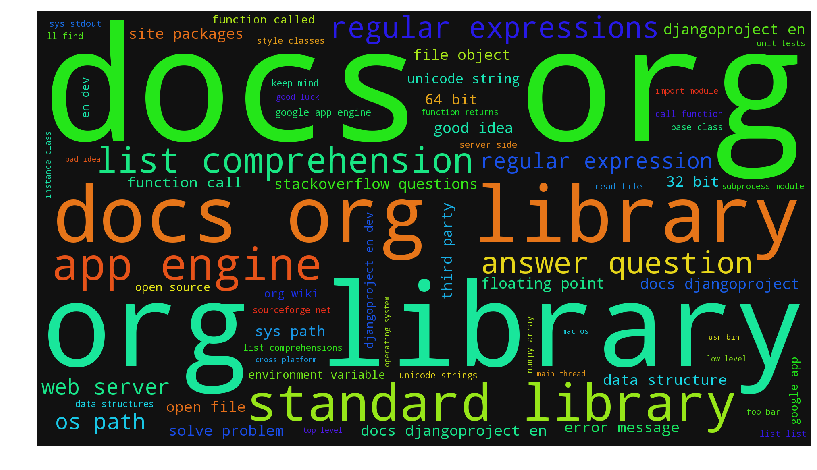

In [15]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2010]

text_dtm = vect.fit_transform(input_data)

word_freq_df_2010 = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df_2010['term'], word_freq_df_2010['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

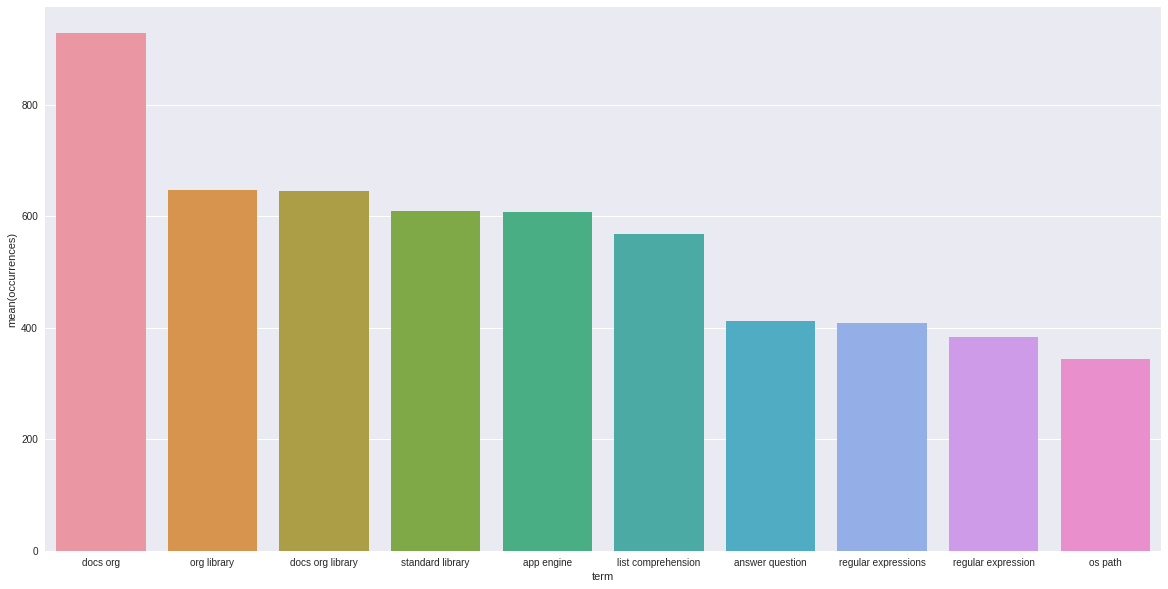

In [24]:
df = word_freq_df_2010.sort_values('occurrences', ascending=False)
plot = sns.barplot(x="term", y="occurrences", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Answers 2009

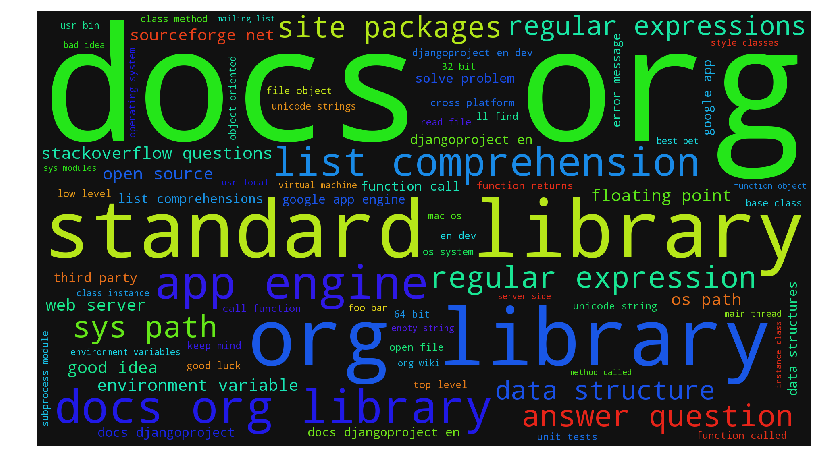

In [16]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2009]

text_dtm = vect.fit_transform(input_data)

word_freq_df_2009 = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df_2009['term'], word_freq_df_2009['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

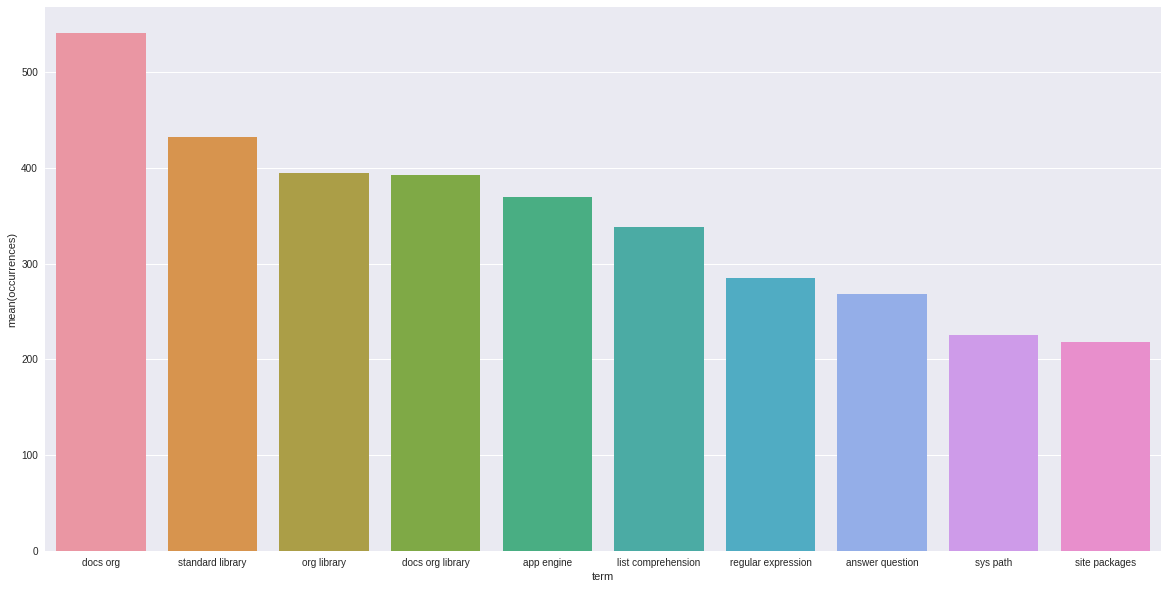

In [25]:
df = word_freq_df_2009.sort_values('occurrences', ascending=False)
plot = sns.barplot(x="term", y="occurrences", data=df[0:10])
plot.figure.set_size_inches(20,10)

# Popular Answers 2008

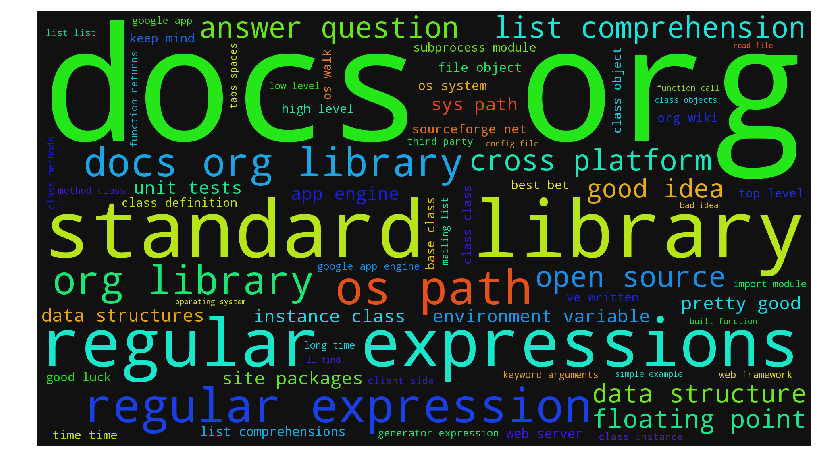

In [17]:
vect = CountVectorizer(min_df=2, max_df=0.8, stop_words=total_stop_words, ngram_range=(2,3))
input_data = data['full_text'][data['year'] == 2008]

text_dtm = vect.fit_transform(input_data)

word_freq_df_2008 = pd.DataFrame({'term': vect.get_feature_names(), 'occurrences':np.asarray(text_dtm.sum(axis=0)).ravel().tolist()})

wc = WordCloud(width=1920, height=1080, scale=1,
               min_font_size=18, margin=20, 
               random_state=27,
               background_color='#111')
wc.generate_from_frequencies(zip(word_freq_df_2008['term'], word_freq_df_2008['occurrences']))
sns.plt.figure( figsize=(16,8) ) 
sns.plt.axis("off")
sns.plt.imshow(wc)

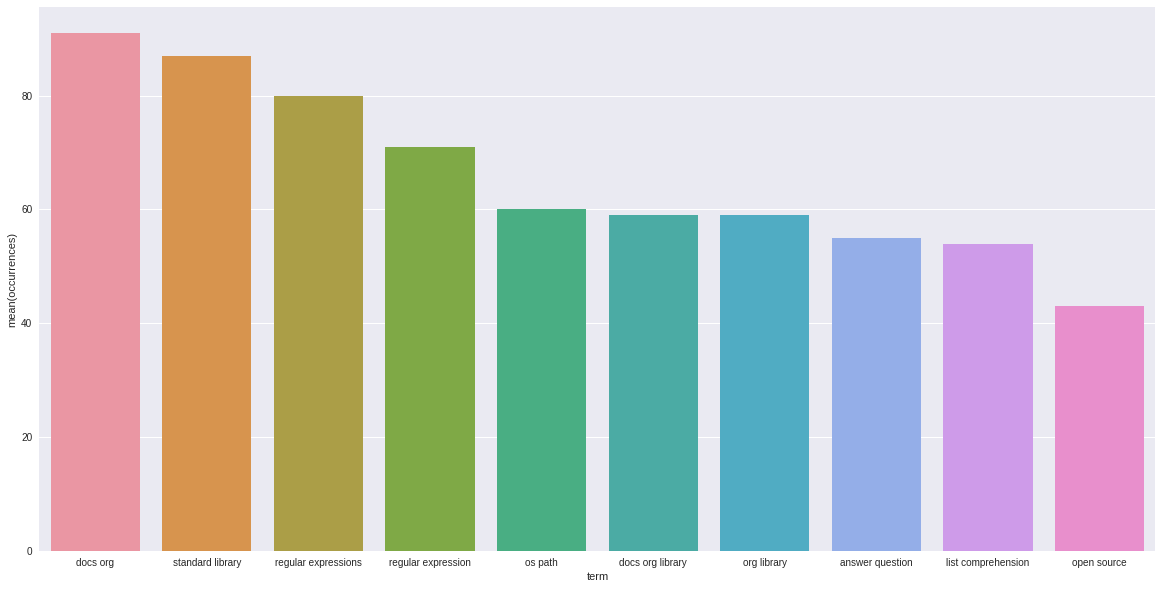

In [26]:
df = word_freq_df_2008.sort_values('occurrences', ascending=False)
plot = sns.barplot(x="term", y="occurrences", data=df[0:10])
plot.figure.set_size_inches(20,10)

Very interesting insights.

We can see that before 2012 (the era when Python is popular as an app engine and not data analysis), most of the answers were related to 'docs org'. This shows that most of the questions asked by people could be found on the documentation itself.

However, after 2012, we can see that most of the answers revolved around 'list comprehension'. Example of list comprehension
```
S = [x**2 for x in range(10)]
V = [2**i for i in range(13)]
M = [x for x in S if x % 2 == 0]
```
This is something special about Python that other languages cannot do. Moreover, this is very similar to the way mathematical notations are expressed e.g
```
S = {x² : x in {0 ... 9}}
V = (1, 2, 4, 8, ..., 2¹²)
M = {x | x in S and x even}
```

Despite being iteresting, these findings do not answer our original questions whether the StackOverflow community is actually asking the most trending questions